<a href="https://colab.research.google.com/github/skizzle010/21BDS0180-EDA-DA/blob/main/EDA_DA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Module 2

In [ ]:
import pandas as pd
import numpy as np

# Load the dataset
file_path = "Suicide data.csv"
df = pd.read_csv(file_path)

# Display first few rows
print(df.head())

# Check data types
print(df.dtypes)

# Reshaping with Hierarchical Indexing
data = np.arange(15).reshape((3, 5))
indexers = ['Category1', 'Category2', 'Category3']
dframe1 = pd.DataFrame(data, index=indexers, columns=['A', 'B', 'C', 'D', 'E'])
print(dframe1)

stacked = dframe1.stack()
print(stacked)

unstacked = stacked.unstack()
print(unstacked)

series1 = pd.Series([0, 111, 222, 333], index=['zero', 'one', 'two', 'three'])
series2 = pd.Series([444, 555, 666], index=['four', 'five', 'six'])

frame2 = pd.concat([series1, series2], keys=['Set1', 'Set2'])
print(frame2.unstack())

# Data Transformation
# Data Deduplication
print("\nData Deduplication")
duplicates = df.duplicated()
print(duplicates.sum())  # Count of duplicate rows
df_dedup = df.drop_duplicates()
print(df_dedup.head())

# Replacing values
print("\nReplacing Values")
df_replaced = df.replace({-1: np.nan, 0: np.nan})  # Replace -1 and 0 with NaN
print(df_replaced.head())

# Handling missing data
print("\nHandling Missing Data")
print(df.isnull().sum())  # Count missing values
df_filled = df.copy()
df_filled[df.select_dtypes(include=[np.number]).columns] = df_filled[df.select_dtypes(include=[np.number]).columns].fillna(df.mean(numeric_only=True))
print(df_filled.head())

# Dropping missing values
df_dropped = df.dropna()
print(df_dropped.head())

# Forward and backward filling
df_ffill = df.fillna(method='ffill')  # Forward fill
df_bfill = df.fillna(method='bfill')  # Backward fill
print(df_ffill.head())
print(df_bfill.head())

# Merging database-style dataframes
# Creating two sample dataframes from the Suicide dataset
dataFrame1 = df.iloc[:15, [0, 3]]  # Selecting first 15 rows and 1st, 4th column as sample
dataFrame2 = df.iloc[15:30, [0, 3]]  # Selecting next 15 rows

# Concatenation - Combining dataframes vertically
dataframe = pd.concat([dataFrame1, dataFrame2], ignore_index=True)
print(dataframe)

# Concatenation - Combining dataframes side by side
combined_df = pd.concat([dataFrame1, dataFrame2], axis=1)
print(combined_df)

# Merging - Inner Join on 'country' column
df1 = df.iloc[:20, [0, 3]]  # Selecting first 20 rows with 1st, 4th column
df2 = df.iloc[10:30, [0, 4]]  # Overlapping 10 rows to have common values
df_merged = df1.merge(df2, how='inner', on=df.columns[0])
print(df_merged)

# Merging - Left Join
df_left = df1.merge(df2, how='left', on=df.columns[0])
print(df_left)

# Merging - Right Join
df_right = df1.merge(df2, how='right', on=df.columns[0])
print(df_right)

# Discretization and Binning
print("\nDiscretization and Binning")

# Selecting a numeric column for binning
suicide_rates = df['suicides/100k pop'].dropna().values

# Defining bin edges
bins = [0, 5, 10, 20, 50, 100]
labels = ['Very Low', 'Low', 'Moderate', 'High', 'Very High']

# Categorizing data into bins
df['Suicide Rate Category'] = pd.cut(df['suicides/100k pop'], bins, labels=labels)
print(df[['suicides/100k pop', 'Suicide Rate Category']].head())

# Checking bin counts
print(df['Suicide Rate Category'].value_counts())

# Finding outliers using IQR method
Q1 = df['suicides_no'].quantile(0.25)
Q3 = df['suicides_no'].quantile(0.75)
IQR = Q3 - Q1
outliers = df[(df['suicides_no'] < (Q1 - 1.5 * IQR)) | (df['suicides_no'] > (Q3 + 1.5 * IQR))]
print(outliers)


   country  year     sex          age  suicides_no  population  \
0  Albania  1987    male  15-24 years           21      312900   
1  Albania  1987    male  35-54 years           16      308000   
2  Albania  1987  female  15-24 years           14      289700   
3  Albania  1987    male    75+ years            1       21800   
4  Albania  1987    male  25-34 years            9      274300   

   suicides/100k pop country-year  HDI for year  gdp_for_year ($)   \
0               6.71  Albania1987           NaN      2,156,624,900   
1               5.19  Albania1987           NaN      2,156,624,900   
2               4.83  Albania1987           NaN      2,156,624,900   
3               4.59  Albania1987           NaN      2,156,624,900   
4               3.28  Albania1987           NaN      2,156,624,900   

   gdp_per_capita ($)       generation  
0                 796     Generation X  
1                 796           Silent  
2                 796     Generation X  
3                 

<ipython-input-14-4df18536c703>:57: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df_ffill = df.fillna(method='ffill')  # Forward fill
<ipython-input-14-4df18536c703>:58: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df_bfill = df.fillna(method='bfill')  # Backward fill


Module 3

   country  year     sex          age  suicides_no  population  \
0  Albania  1987    male  15-24 years           21      312900   
1  Albania  1987    male  35-54 years           16      308000   
2  Albania  1987  female  15-24 years           14      289700   

   suicides/100k pop country-year  HDI for year  gdp_for_year ($)   \
0               6.71  Albania1987           NaN      2,156,624,900   
1               5.19  Albania1987           NaN      2,156,624,900   
2               4.83  Albania1987           NaN      2,156,624,900   

   gdp_per_capita ($)    generation  
0                 796  Generation X  
1                 796        Silent  
2                 796  Generation X  
          country  year     sex          age  suicides_no  population  \
27817  Uzbekistan  2014    male   5-14 years           60     2762158   
27818  Uzbekistan  2014  female   5-14 years           44     2631600   
27819  Uzbekistan  2014  female  55-74 years           21     1438935   

       su

<ipython-input-11-3df0ec3f8ed7>:27: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(df[col].median(), inplace=True)


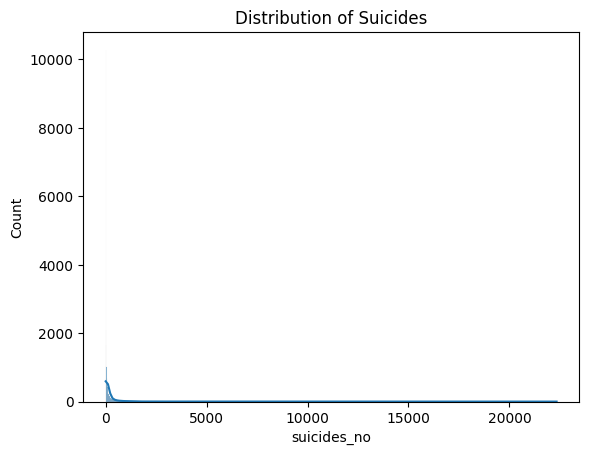

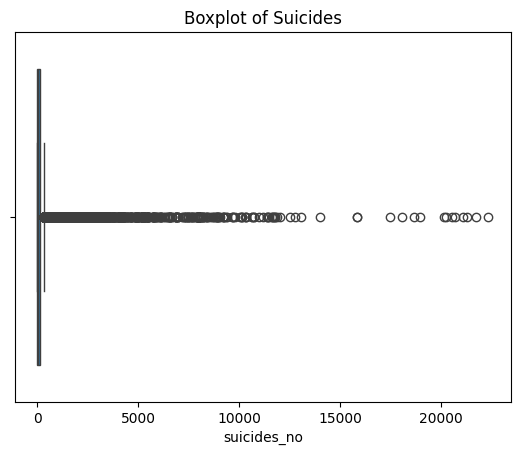


Bivariate Analysis


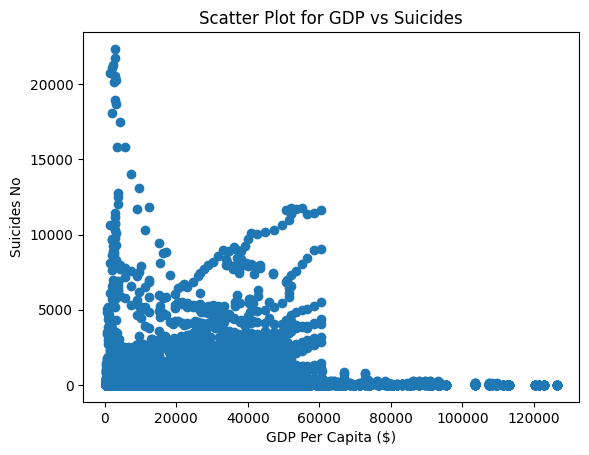


Correlation between GDP Per Capita and Suicides: [[1.         0.06132975]
 [0.06132975 1.        ]]


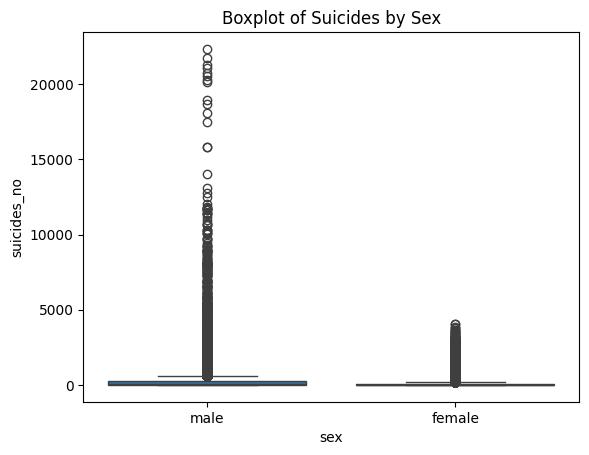

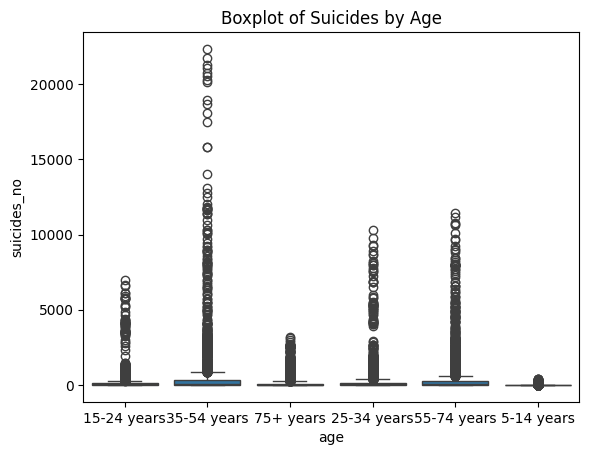

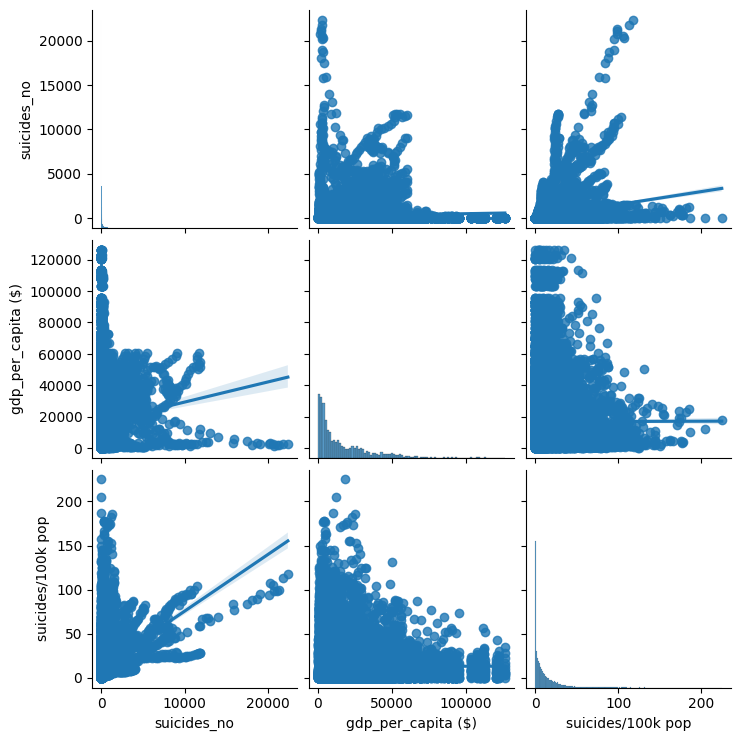

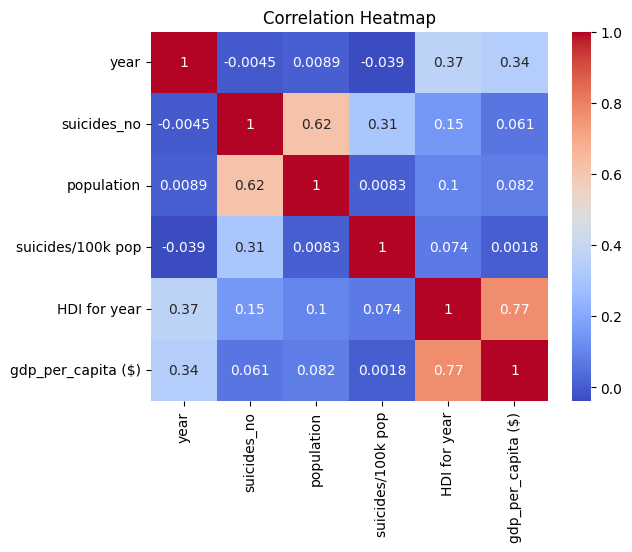

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

# Load the dataset
file_path = "Suicide data.csv"
df = pd.read_csv(file_path)

# Display first and last 3 rows
print(df.head(3))
print(df.tail(3))

# Check data types
print(df.dtypes)

# Find descriptive statistics
print(df.describe())

# Check for missing values
print(pd.isna(df).any())

# Handling missing values
columns_to_clean = ['suicides_no', 'gdp_per_capita ($)', 'suicides/100k pop']
for col in columns_to_clean:
    df[col].fillna(df[col].median(), inplace=True)

# Univariate Analysis
print("\nUnivariate Analysis")
print("Mean Suicides:", df["suicides_no"].mean())
print("Median Suicides:", df["suicides_no"].median())
print("Mode Suicides:", df["suicides_no"].mode()[0])

sns.histplot(df["suicides_no"], kde=True)
plt.title("Distribution of Suicides")
plt.show()

sns.boxplot(x=df["suicides_no"])
plt.title("Boxplot of Suicides")
plt.show()

# Bivariate Analysis
print("\nBivariate Analysis")
plt.scatter(df["gdp_per_capita ($)"], df["suicides_no"])
plt.xlabel("GDP Per Capita ($)")
plt.ylabel("Suicides No")
plt.title("Scatter Plot for GDP vs Suicides")
plt.show()

corr_gdp_suicides = np.corrcoef(df["gdp_per_capita ($)"], df["suicides_no"])
print("\nCorrelation between GDP Per Capita and Suicides:", corr_gdp_suicides)

sns.boxplot(x="sex", y="suicides_no", data=df)
plt.title("Boxplot of Suicides by Sex")
plt.show()

sns.boxplot(x="age", y="suicides_no", data=df)
plt.title("Boxplot of Suicides by Age")
plt.show()

# Multivariate Analysis
sns.pairplot(df, vars=['suicides_no', 'gdp_per_capita ($)', 'suicides/100k pop'], kind="reg")
plt.show()

# Heatmap of correlations
correlation = df.corr(method='pearson', numeric_only=True)
sns.heatmap(correlation, xticklabels=correlation.columns, yticklabels=correlation.columns, annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()



Module3_TS

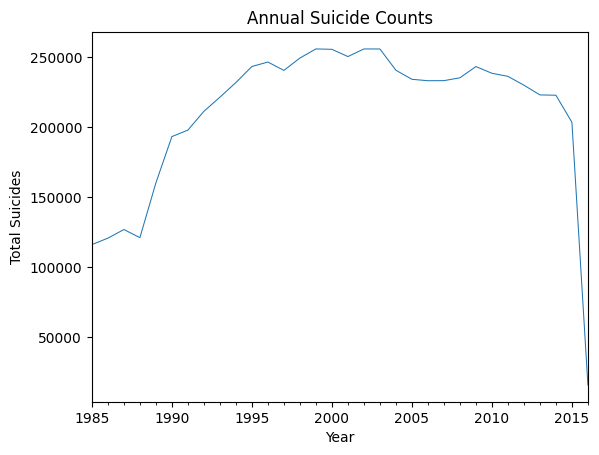

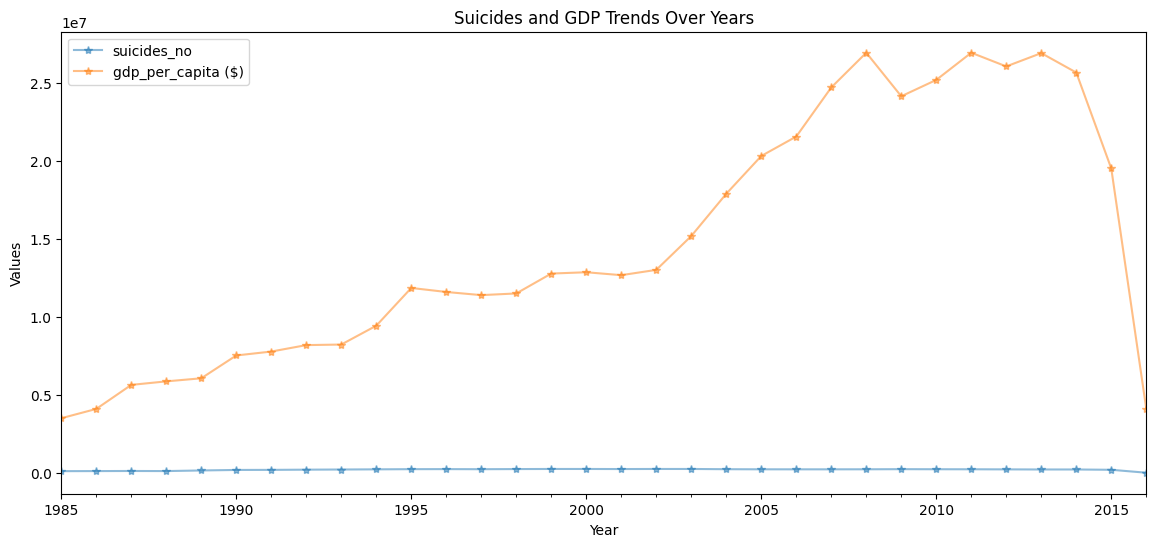

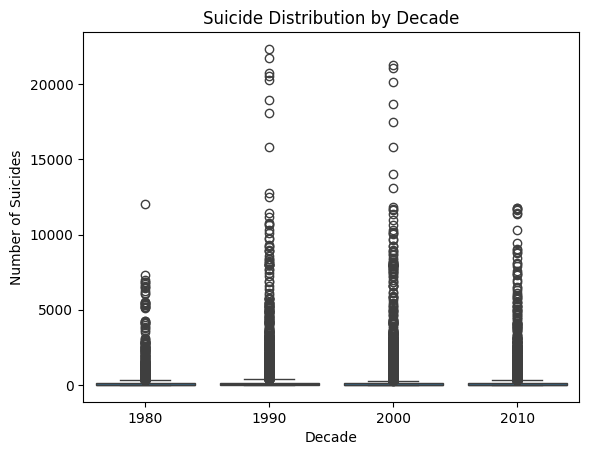

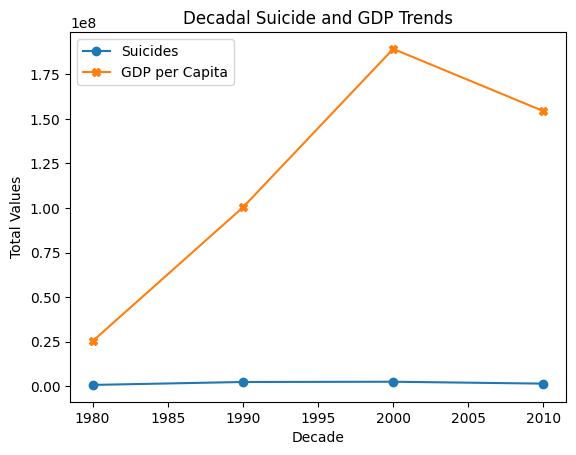

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
file_path = "Suicide data.csv"
df = pd.read_csv(file_path)

# Convert Year column to datetime format
df['year'] = pd.to_datetime(df['year'], format='%Y')

# Set Year as index
df.set_index('year', inplace=True)

# Add additional time-based features
df['Decade'] = (df.index.year // 10) * 10

# Visualize full time series
df.groupby('year')['suicides_no'].sum().plot(linewidth=0.75)
plt.title('Annual Suicide Counts')
plt.ylabel('Total Suicides')
plt.xlabel('Year')
plt.show()

# Plot multiple variables
df.groupby('year')[['suicides_no', 'gdp_per_capita ($)']].sum().plot(marker='*', alpha=0.5, linestyle='-', figsize=(14, 6))
plt.title('Suicides and GDP Trends Over Years')
plt.ylabel('Values')
plt.xlabel('Year')
plt.show()

# Box plot by decade
sns.boxplot(x='Decade', y='suicides_no', data=df)
plt.title('Suicide Distribution by Decade')
plt.xlabel('Decade')
plt.ylabel('Number of Suicides')
plt.show()

# Resample data per decade
decadal_data = df.groupby('Decade')[['suicides_no', 'gdp_per_capita ($)']].sum()

# Plot resampled data
fig, ax = plt.subplots()
ax.plot(decadal_data.index, decadal_data['suicides_no'], marker='o', linestyle='-', label='Suicides')
ax.plot(decadal_data.index, decadal_data['gdp_per_capita ($)'], marker='X', linestyle='-', label='GDP per Capita')
ax.set_ylabel('Total Values')
ax.set_xlabel('Decade')
ax.legend()
plt.title('Decadal Suicide and GDP Trends')
plt.show()


Module 5 Clustering

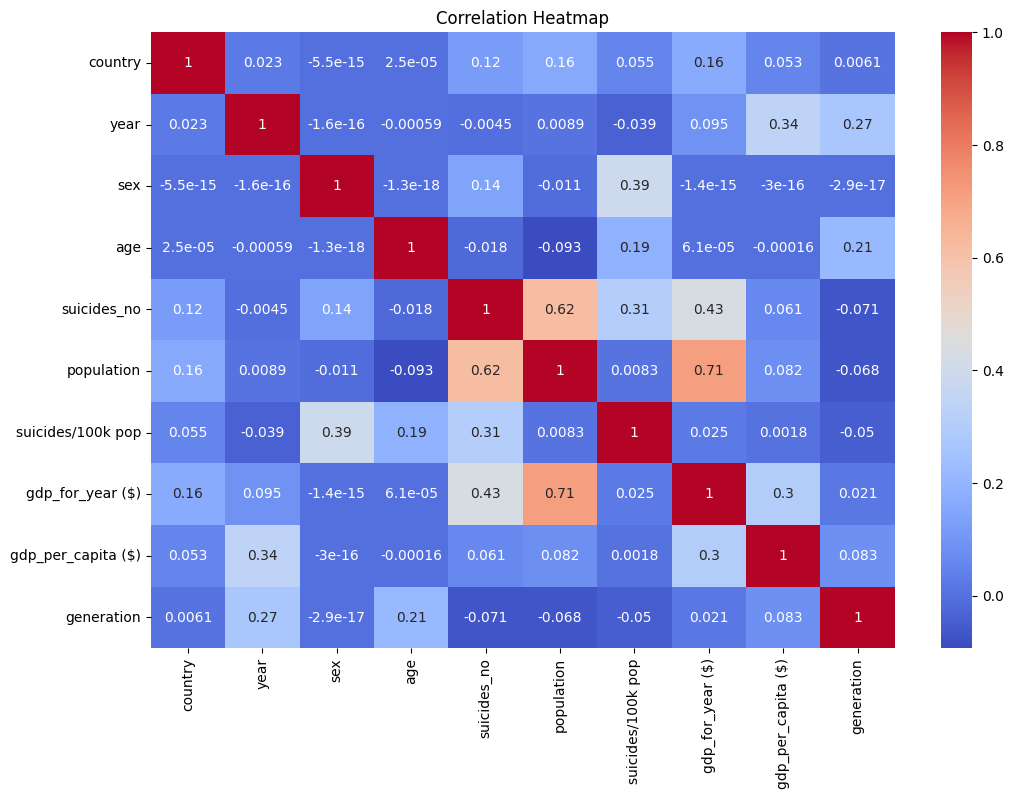

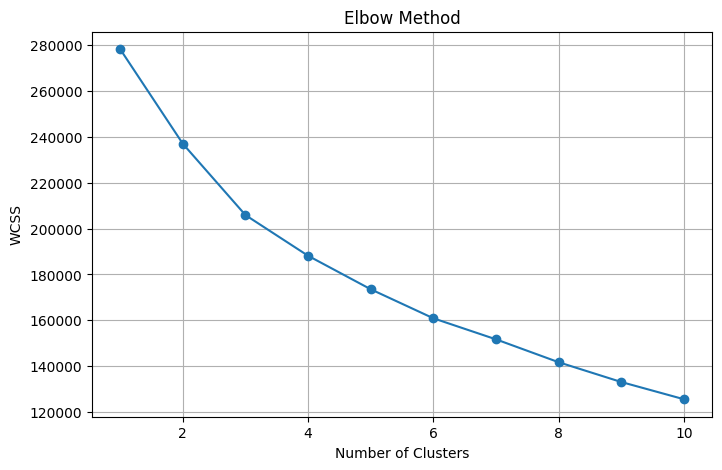

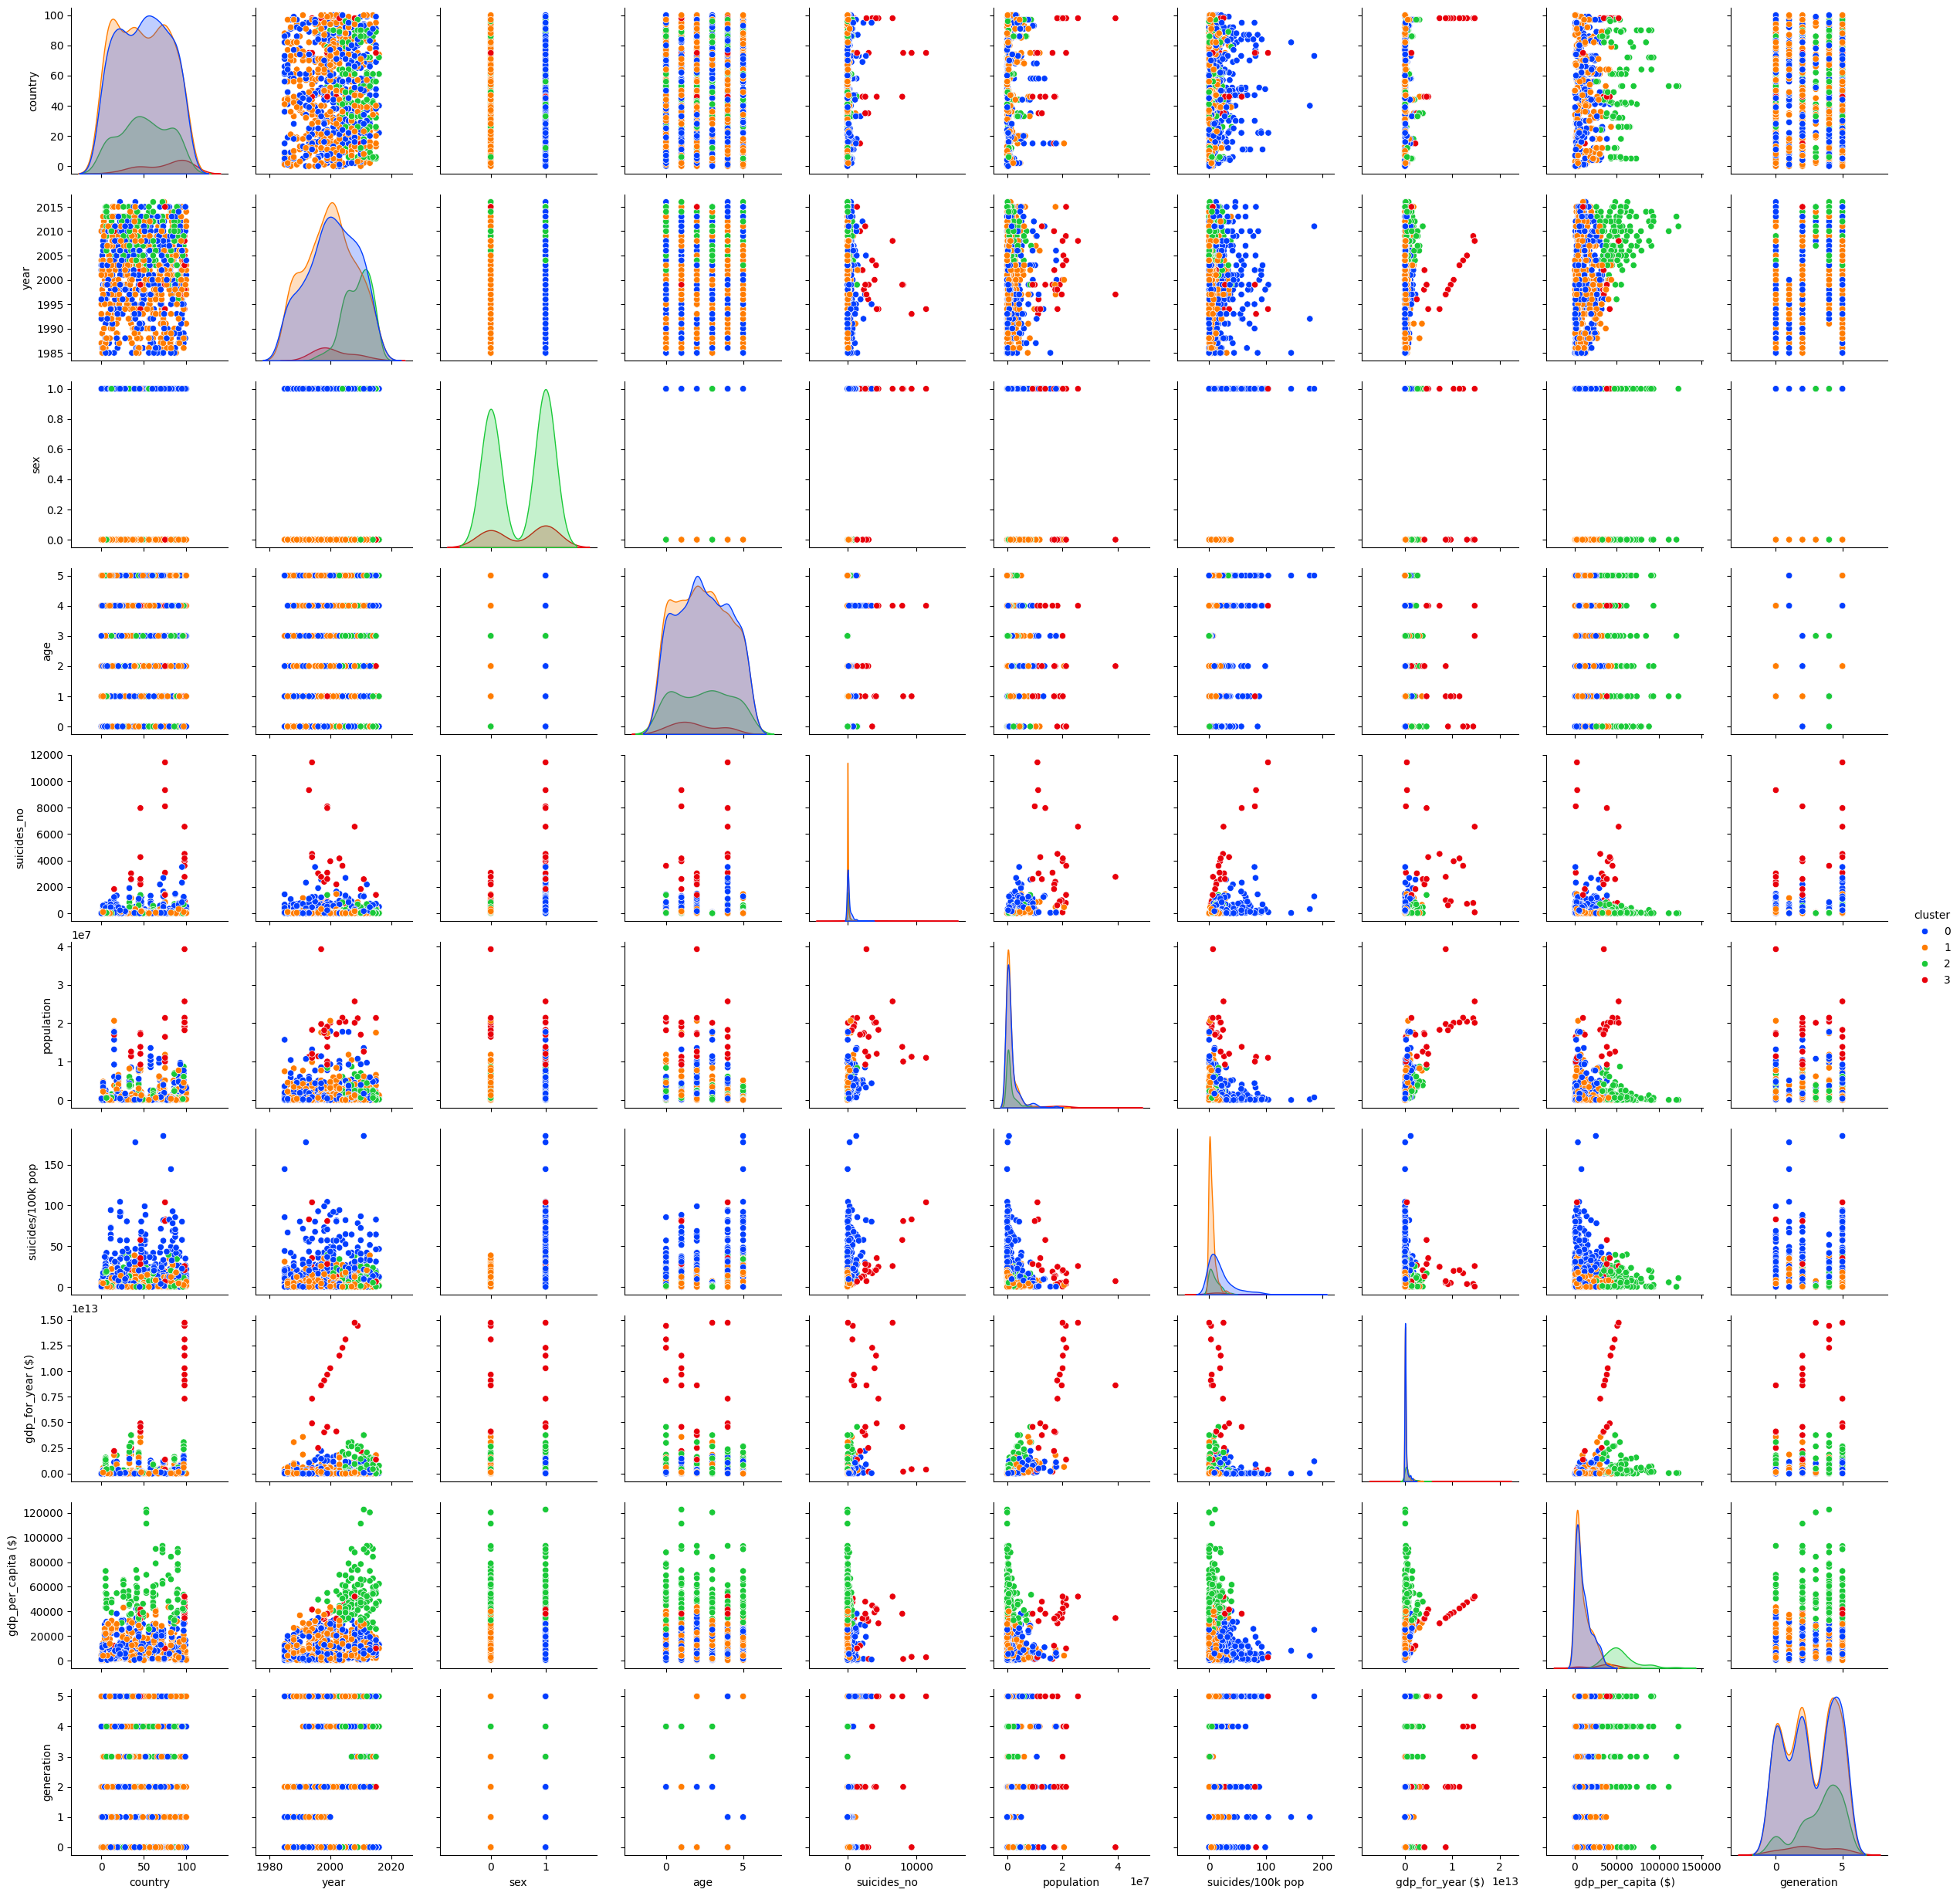

In [ ]:
# Import libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.cluster import KMeans

# Load dataset
df = pd.read_csv("Suicide data.csv")

# Clean column names
df.columns = df.columns.str.strip()

# Drop mostly-null column
df = df.drop(columns=["HDI for year"])

# Convert GDP column to numeric
df['gdp_for_year ($)'] = df['gdp_for_year ($)'].str.replace(',', '').astype(float)

# Drop 'country-year' column
df = df.drop(columns=['country-year'])

# Encode categorical variables
label_encoders = {}
cat_columns = ['country', 'sex', 'age', 'generation']
for col in cat_columns:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le

# Display correlation heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()

# Normalize features
scaler = StandardScaler()
scaled_df = scaler.fit_transform(df)

# Elbow method to find optimal clusters
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=42, n_init=10)
    kmeans.fit(scaled_df)
    wcss.append(kmeans.inertia_)

plt.figure(figsize=(8, 5))
plt.plot(range(1, 11), wcss, marker='o')
plt.title("Elbow Method")
plt.xlabel("Number of Clusters")
plt.ylabel("WCSS")
plt.grid(True)
plt.show()

# Apply KMeans with optimal K (you can choose e.g. k=3 or 4 based on the elbow plot)
k = 4
kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
df['cluster'] = kmeans.fit_predict(scaled_df)

# Pairplot for clusters (reduced subset to avoid performance lag)
sns.pairplot(df.sample(1000), hue='cluster', diag_kind='kde', palette='bright')
plt.show()


Module 7 Model Evaluation

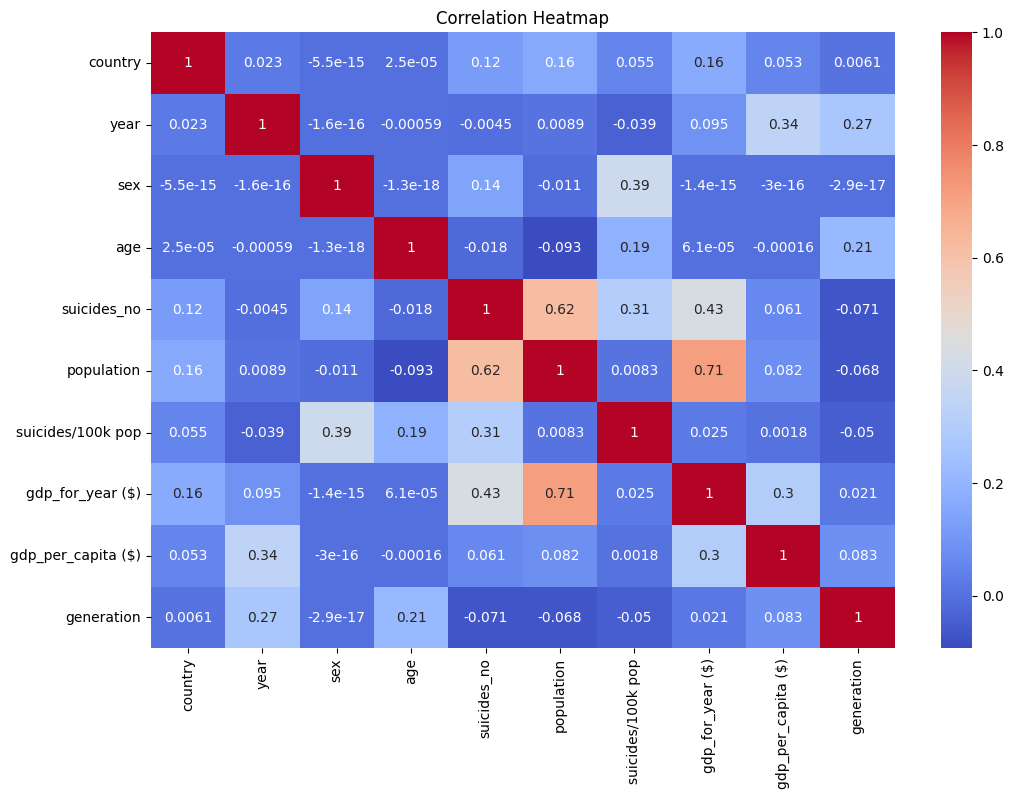

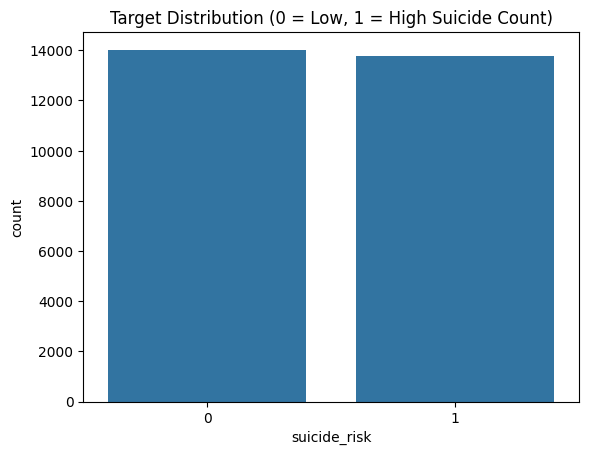


--- Logistic Regression ---
Accuracy: 0.8351306014857417
Confusion Matrix:
 [[3744  433]
 [ 943 3226]]
Classification Report:
               precision    recall  f1-score   support

           0       0.80      0.90      0.84      4177
           1       0.88      0.77      0.82      4169

    accuracy                           0.84      8346
   macro avg       0.84      0.84      0.83      8346
weighted avg       0.84      0.84      0.83      8346


--- Decision Tree ---
Accuracy: 0.9929307452671938
Confusion Matrix:
 [[4142   35]
 [  24 4145]]
Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.99      0.99      4177
           1       0.99      0.99      0.99      4169

    accuracy                           0.99      8346
   macro avg       0.99      0.99      0.99      8346
weighted avg       0.99      0.99      0.99      8346


--- Random Forest ---
Accuracy: 0.9919722022525761
Confusion Matrix:
 [[4147   30]
 [  37 4132]

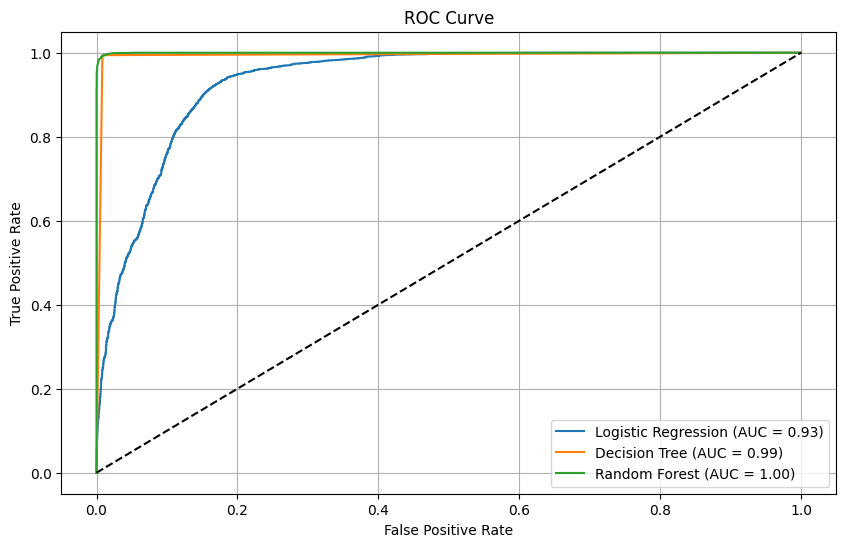

In [ ]:
# Import libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_curve, auc

# Load and clean dataset
df = pd.read_csv("Suicide data.csv")
df.columns = df.columns.str.strip()
df.drop(columns=["HDI for year", "country-year"], inplace=True)
df['gdp_for_year ($)'] = df['gdp_for_year ($)'].str.replace(',', '').astype(float)

# Label encode categorical features
label_encoders = {}
for col in ['country', 'sex', 'age', 'generation']:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le

# ------------------------ VISUALIZATION PART ------------------------

# Heatmap of feature correlation
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()

# Binarize the target for classification: high vs low suicide number
threshold = df['suicides_no'].median()
df['suicide_risk'] = (df['suicides_no'] > threshold).astype(int)

# Bar plot of target distribution
sns.countplot(data=df, x='suicide_risk')
plt.title("Target Distribution (0 = Low, 1 = High Suicide Count)")
plt.show()

# ------------------------ MODELING PART ------------------------

# Define features and target
X = df.drop(columns=['suicides_no', 'suicide_risk'])
y = df['suicide_risk']

# Normalize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)

# Models
logreg = LogisticRegression()
dt = DecisionTreeClassifier()
rf = RandomForestClassifier()

# Fit models
logreg.fit(X_train, y_train)
dt.fit(X_train, y_train)
rf.fit(X_train, y_train)

# Predictions
y_pred_logreg = logreg.predict(X_test)
y_pred_dt = dt.predict(X_test)
y_pred_rf = rf.predict(X_test)

# Evaluation function
def evaluate_model(y_true, y_pred, name):
    print(f"\n--- {name} ---")
    print("Accuracy:", accuracy_score(y_true, y_pred))
    print("Confusion Matrix:\n", confusion_matrix(y_true, y_pred))
    print("Classification Report:\n", classification_report(y_true, y_pred))

# Evaluate all
evaluate_model(y_test, y_pred_logreg, "Logistic Regression")
evaluate_model(y_test, y_pred_dt, "Decision Tree")
evaluate_model(y_test, y_pred_rf, "Random Forest")

# ------------------------ ROC CURVE ------------------------

plt.figure(figsize=(10, 6))
for model, name in zip([logreg, dt, rf], ["Logistic Regression", "Decision Tree", "Random Forest"]):
    y_proba = model.predict_proba(X_test)[:, 1]
    fpr, tpr, _ = roc_curve(y_test, y_proba)
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f"{name} (AUC = {roc_auc:.2f})")

plt.plot([0, 1], [0, 1], 'k--')
plt.title("ROC Curve")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend(loc="lower right")
plt.grid(True)
plt.show()
